In [15]:
pip install numpy_financial

In [23]:
import numpy as np
import pandas as pd
import numpy_financial as npf

The numpy-financial package contains a collection of elementary financial functions.



**Exercise 1**

Create a function to convert APR to Rm (Periodic Rate = APR2/m2).

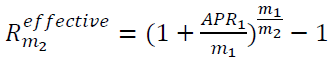


Test your code with this example. A bank offers 10% annual rate compounding semi-annually. What is its equivalent effective quarterly rate?  

equivalent effective quarterly rate = Periodic rate ของการทบต้นแบบ 4 ครั้ง (quarterly)

R Periodic m2

In [24]:
## Define your function here
def APR2Rm(APR1,m1,m2):
    rm = ((1 + APR1/m1)**(m1/m2))-1
    return rm

In [25]:
## Test your function
APR1 = 0.1
m1 = 2
m2 = 4
## Expected result = 0.02469507659595993
APR2Rm(APR1,m1,m2)

0.02469507659595993

**Exercise 2**

Assume that we bought a zero-coupon bond for \$717.25. The face value of the bond is $1,000  and it would mature in 10 years. What is its YTM?

Expected Result = 0.03379146977122812

In [26]:
## Write your code here
npf.rate(nper=10, pmt=0, pv=-717.25, fv=1000)

0.03379146977122812

**Exercise 3**

Which of the bonds from the options below will be the riskiest.

1. A 20 year zero coupon bond with a 2% yield.

2. A 10 year bond with a 3% annual coupon and 4% yield.

3. A 20 year zero coupon bond with a 3% yield.
4. A 10 year bond with a 5% annual coupon and 4% yield.




In [27]:
# Define function to calculate bond duration.
def durationBond(d_rate, d_nper,d_couponrate, d_fv=100):
  #d_rate = bond yield
  #d_nper = duration
  #d_couponrate = coupon rate
  #d_fv = face value

  pv_down = npf.pv(rate=d_rate-0.01,nper=d_nper, pmt=d_couponrate*d_fv, fv=d_fv)
  pv_up = npf.pv(rate=d_rate+0.01,nper=d_nper, pmt=d_couponrate*d_fv, fv=d_fv)
  pv = npf.pv(rate=d_rate,nper=d_nper, pmt=d_couponrate*d_fv, fv=d_fv)
  duration = (pv_down - pv_up) / (2 * pv * 0.01)
  return duration

In [28]:
## Write your code here
bond = {
    "bond_name": ["A", "B", "C", "D"],
    "d_rate": [0.02, 0.04, 0.03, 0.04],
    "d_nper": [20, 10, 20, 10],
    "d_crate": [0, 0.03, 0, 0.05]
}

# Create Dataframe and create duration column
df_bond_duration = pd.DataFrame(bond)
df_bond_duration["duration"] = durationBond(df_bond_duration["d_rate"], df_bond_duration["d_nper"], df_bond_duration["d_crate"])
df_bond_duration

,bond_name,d_rate,d_nper,d_crate,duration
0,A,0.02,20,0.00,19.753346
1,B,0.04,10,0.03,8.403319
2,C,0.03,20,0.00,19.558775
3,D,0.04,10,0.05,7.890234


In [29]:
bond_name_max = df_bond_duration[df_bond_duration["duration"] == df_bond_duration["duration"].max()]["bond_name"].to_string(index = False)
max_duration = df_bond_duration["duration"].max()

print(f"Bond {bond_name_max} has a maximum duration of {max_duration:.2f}, so Bond A is the riskiest")

Bond A has a maximum duration of 19.75, so Bond A is the riskiest
